In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = 'data/csse_covid_19_time_series/'

# laod data
data_Confirmed = pd.read_csv(os.path.join(path, 'time_series_19-covid-Confirmed.csv'))
data_Deaths = pd.read_csv(os.path.join(path, 'time_series_19-covid-Deaths.csv'))
data_Recovered = pd.read_csv(os.path.join(path, 'time_series_19-covid-Recovered.csv'))

# remove extra fields
data_Confirmed.drop(['Province/State', 'Lat', 'Long'], axis=1, inplace=True)
data_Deaths.drop(['Province/State', 'Lat', 'Long'], axis=1, inplace=True)
data_Recovered.drop(['Province/State', 'Lat', 'Long'], axis=1, inplace=True)

In [4]:
def get_time_series(data, country='Pakistan', days=-1):
    data = data.loc[data['Country/Region'] == country]

    start = False
    cum_cases = list()

    for col in data:
        if data.dtypes[col] != "object":
            cases = data[col].sum()
            
            if cases == 0 and not start:
                continue
            elif not start:
                start = True

            if start:
                cum_cases.append(cases)
            
            if days != -1 and len(cum_cases) == days:
                break
    
    return cum_cases

In [5]:
def plot_country_spread(data, countries, prefix, days=-1):
    plt.figure(figsize=(10,7))
    
    for cunt in countries:
        stats = get_time_series(data, cunt, days)
        plt.plot(range(len(stats)), stats, label=cunt)
        
    plt.ylabel(prefix.capitalize()+' Reported')
    plt.xlabel('Days since first case reported')
    
    plt.legend()
    
    if days == -1:
        plt.title('Comparison of COVID-19 '+prefix)
    else:
        plt.title('Comparison of COVID-19 '+prefix+' for first '+str(days)+' days')

    plt.show()

In [14]:
top_countries = ['Pakistan', 'Italy', 'Spain', 'Germany', 'United Kingdom', 'France', 'Switzerland', 'United States']

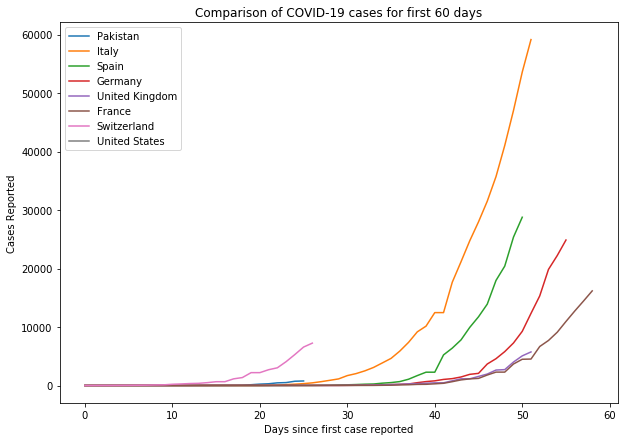

In [15]:
plot_country_spread(data_Confirmed, top_countries, 'cases', 60)

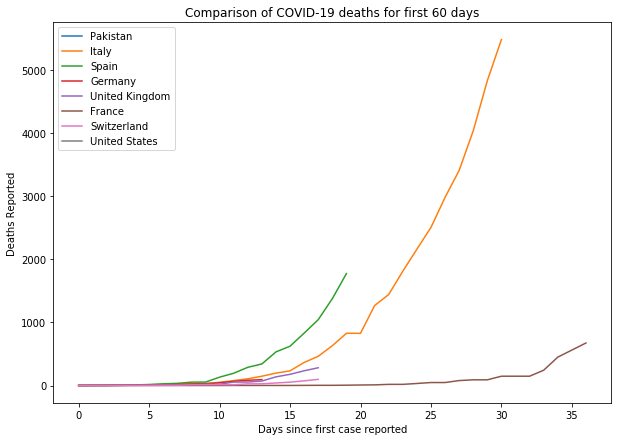

In [16]:
plot_country_spread(data_Deaths, top_countries, 'deaths', 60)

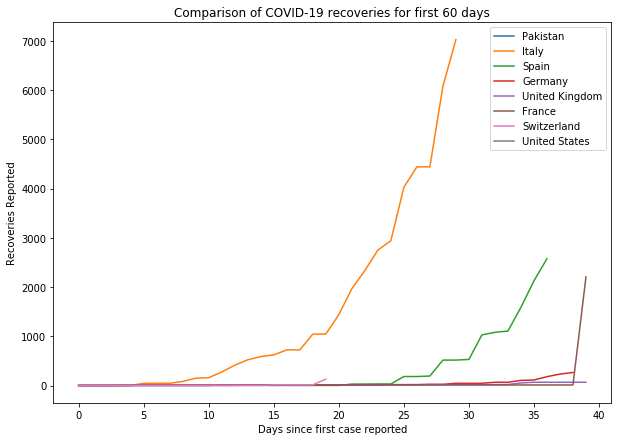

In [19]:
plot_country_spread(data_Recovered, top_countries, 'recoveries', 60)

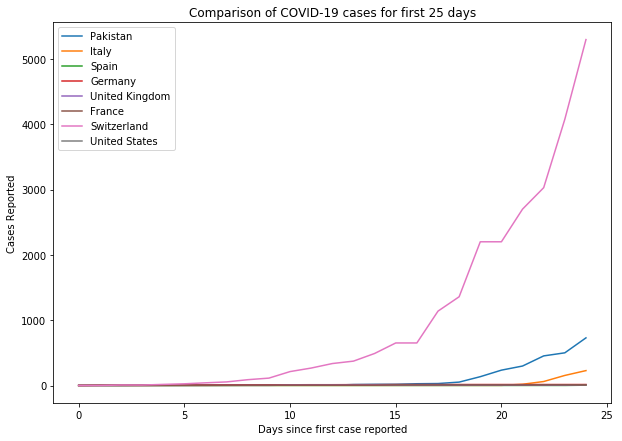

In [22]:
plot_country_spread(data_Confirmed, top_countries, 'cases', 25)

In [10]:
# number of days to reach a certain number of cases after first case
def days_to_cases(data, country, max_cases):
    data = data.loc[data['Country/Region'] == country]
    start = False
    
    days = 0
    cum_cases = 0
    
    for col in data:
        if data.dtypes[col] != "object":
            cases = data[col].sum()
            
            if cases == 0 and not start:
                continue
            elif not start:
                start = True

            if start:
                days += 1
                cum_cases += cases
            
            if cum_cases >= max_cases:
                break
                
    return days

In [11]:
def plot_cases_climb(data, countries, max_cases, prefix):
    plt.figure(figsize=(0.75*len(countries),6))
               
    values = list()
    for cunt in countries:
        values.append(days_to_cases(data, cunt, max_cases))
               
    plt.bar(range(len(countries)), values)
    plt.xticks(range(len(countries)), countries, rotation=90)
    plt.ylabel('Days since first case reported')
    
    plt.title('Comparison of number of days taken by countries to reach '+str(max_cases)+' '+prefix)

    [plt.text(i-0.15, v+0.25, '{:d}'.format(v)) for i, v in enumerate(values)]
    plt.show()

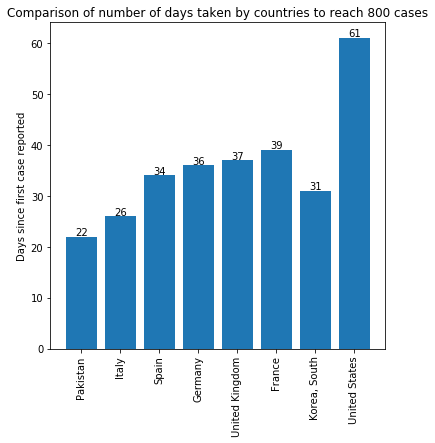

In [12]:
plot_cases_climb(data_Confirmed, top_countries, 800, 'cases')

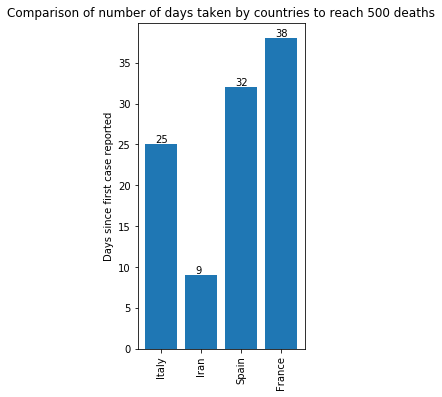

In [13]:
plot_cases_climb(data_Confirmed, ['Italy', 'Iran', 'Spain', 'France'], 500, 'deaths')

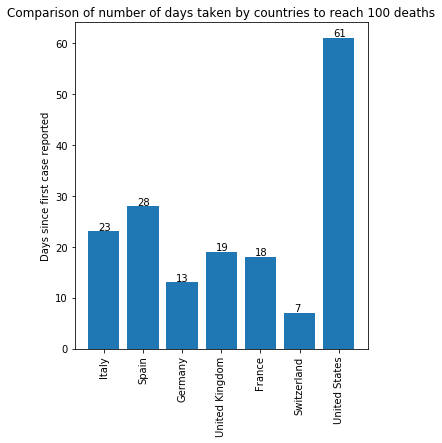

In [23]:
plot_cases_climb(data_Confirmed, top_countries[1:], 100, 'deaths')